In [1]:
!dir

README.md	    evaluate.py      logs	     nyu_depth_v2_labeled.mat
__pycache__	    image_helper.py  main.py	     test_run.py
augment_data.ipynb  img_results      main_backup.py  txt_results
data.py		    lets_run.ipynb   model.py	     viewImg.py
data_backup.py	    logger.py	     models


In [1]:
import os
# import scipy.io as sio
import torchvision.transforms as transforms
from PIL import Image
import torch.nn as nn
import torch
import copy
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [26]:
filename = 'nyu_depth_v2_labeled.mat'
# outname = 'augment_data.mat'
f = h5py.File(filename, 'r')
# f2 = h5py.File(outname, 'a')
print(f)
print(f['images'])
print(f['depths'])
# print(f2)
# fout = open('augment_data.mat', 'a+')

<HDF5 file "nyu_depth_v2_labeled.mat" (mode r)>
<HDF5 dataset "images": shape (1449, 3, 640, 480), type "|u1">
<HDF5 dataset "depths": shape (1449, 640, 480), type "<f4">


In [3]:
# train_images = f['images'][0:1024]
# train_depths = f['depths'][0:1024]
# fout['test'] = np.array([1, 2, 3])
# sio.savemat(fout, {'test': f['images'][0]})
image_folder = 'image_folder/training_image_'
depth_folder = 'depth_folder/training_depth_'

In [4]:
transform_ops = ['flip', 'color']

flip_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(1),
    transforms.ToTensor()
])

color_transform = transforms.Compose([
    transforms.RandomApply(torch.nn.ModuleList([
        transforms.ColorJitter(0.4, 0.4, 0.4, 0.1),
    ]), p=1)
    # transforms.ToTensor()
])

def matrixflip(x, d):
    myl = np.array(x)
    return np.flip(myl, axis=d)

In [6]:
# augment_train_img = np.zeros((1024 * len(transform_ops), 3, 640, 480))
# augment_train_dep = np.zeros((1024 * len(transform_ops), 3, 640, 480))

In [97]:
for i in range(1024):
    
    img = f['images'][i].transpose((2, 1, 0))
    out_dir = image_folder + str(i * (1 + len(transform_ops)))
    # if not os.path.exists(out_dir): os.mkdir(out_dir)
    # np.save(out_dir, img)
    img_disp = Image.fromarray(img)
    img_disp.save(out_dir+'.jpg')
    # display(img_disp)
    
    # Transform 1: Horizontal Flip
    img_t = matrixflip(img, 1)
    img_t_disp = Image.fromarray(img_t)
    # display(img_t_disp)
    img_t = img_t.transpose((2, 1, 0))
    # augment_train_img[i*2] = img_t
    out_dir = image_folder + str(i * (1 + len(transform_ops)) + 1)
    # np.save(out_dir, img_t)
    img_t_disp.save(out_dir+'.jpg')
    
    dep = f['depths'][i]
    
    # out_dir = depth_folder + str(i * (1 + len(transform_ops)))
    # np.save(out_dir, dep)
    
    # plt.imshow(dep.T)
    dep_t = matrixflip(dep, 0)
    # augment_train_dep[i*2] = dep_t
    # out_dir = depth_folder + str(i * (1 + len(transform_ops)) + 1)
    # np.save(out_dir, dep_t)
    # plt.imshow(dep_t.T)
    
    # Transform 2: Color Jitter
    img_t = color_transform(img_disp)
    # img_t = np.array(img_t).transpose((2, 1, 0))
    out_dir = image_folder + str(i * (1 + len(transform_ops)) + 2)
    # np.save(out_dir, img_t)
    # display(img_t)
    img_t.save(out_dir+'.jpg')
    # out_dir = depth_folder + str(i * (1 + len(transform_ops)) + 2)
    # np.save(out_dir, dep)
    
    # print('train=', train_images[i].shape,#  train_images[i],
    #       '\ntrans=', img_t.shape) #, img_t)
    # display(Image.fromarray(img_t))
    # augment_train_img[i*2+1] = img_t
    # augment_train_dep[i*2+1] = dep
    
    if (i+1) % 50 == 0:
        print(i+1, 'images done!')

print('Finished!')

50 images done!
100 images done!
150 images done!
200 images done!
250 images done!
300 images done!
350 images done!
400 images done!
450 images done!
500 images done!
550 images done!
600 images done!
650 images done!
700 images done!
750 images done!
800 images done!
850 images done!
900 images done!
950 images done!
1000 images done!
Finished!


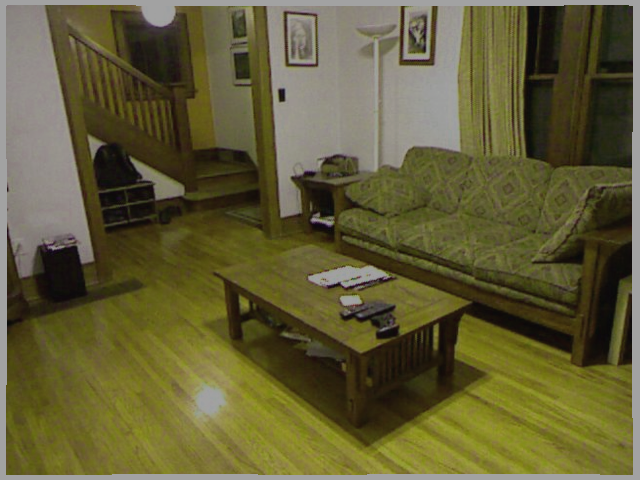

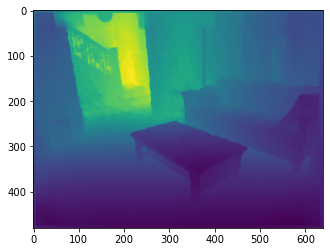

In [30]:
# for npy files
lookat = 600*3+2
x = np.load(image_folder+str(lookat)+'.npy')
display(Image.fromarray(x.transpose((2, 1, 0))))
y = np.load(depth_folder+str(lookat)+'.npy')
plt.imshow(y.T)

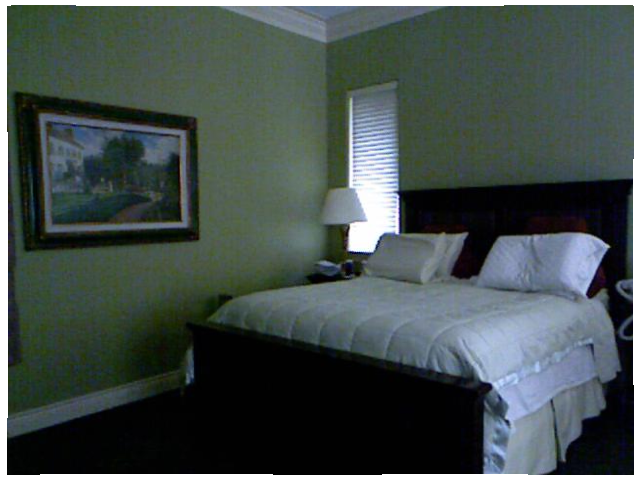

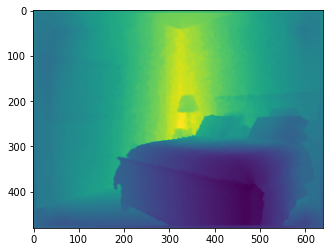

In [64]:
lookat = 1024*3-2
x = np.load(image_folder+str(lookat)+'.npy')
display(Image.fromarray(x.transpose((2, 1, 0))))
y = np.load(depth_folder+str(lookat)+'.npy')
plt.imshow(y.T)

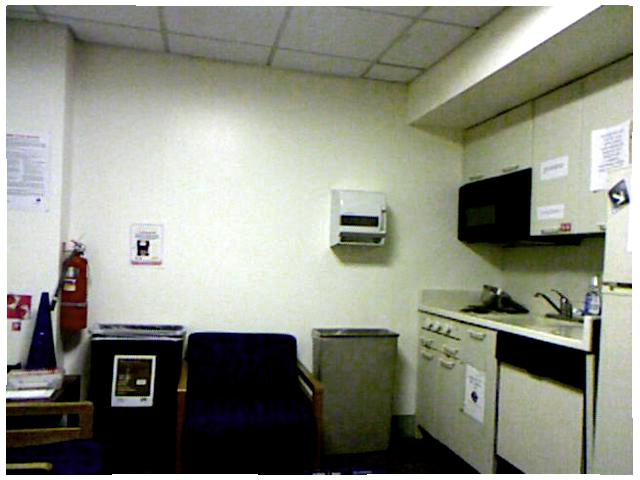

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480 at 0x7F14258A0F90>


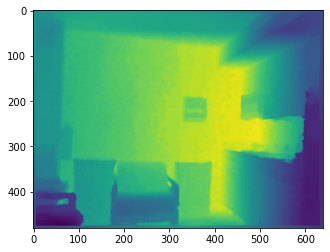

In [98]:
lookat = 2
x = Image.open(image_folder+str(lookat)+'.jpg')
display(x)
print(x)
y = np.load(depth_folder+str(lookat)+'.npy')
plt.imshow(y.T)

(640, 480)
(640, 480)
(1, 640, 480)
(1, 480, 640)
torch.Size([1, 1, 480, 640])
(1, 1, 55, 74)
[[[0.4486734  0.47023863 0.5081332  ... 0.49738216 0.48957503 0.4827537 ]
  [0.43126765 0.4092762  0.35787097 ... 0.4103116  0.41044065 0.4772107 ]
  [0.4135241  0.34720287 0.35243836 ... 0.40947244 0.40925545 0.47210866]
  ...
  [0.1723608  0.13612108 0.1353057  ... 0.4141608  0.45921323 0.4194961 ]
  [0.17292884 0.13543002 0.13203663 ... 0.27428263 0.45692348 0.41440657]
  [0.17372663 0.17498343 0.17666624 ... 0.39411363 0.40169194 0.40878317]]]


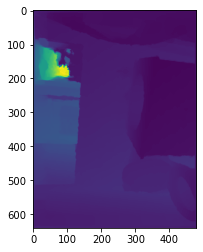

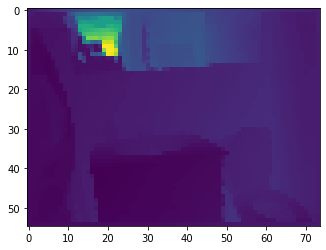

In [4]:
# depth = np.load(depth_folder+'0.npy')
depth = f['depths'][169]
print(depth.shape)
depth = np.flipud(depth).copy()
print(depth.shape)
plt.figure()
plt.imshow(depth)
depth = depth.reshape((1, depth.shape[0], depth.shape[1]))
print(depth.shape)
depth = depth.transpose((0, 2, 1))
# depth = depth.transpose((2, 0, 1))
print(depth.shape)
depth = torch.from_numpy(depth)
depth = depth.view(1, depth.shape[0], depth.shape[1], depth.shape[2])
print(depth.shape)
depth = nn.functional.interpolate(depth, size = (55, 74), mode='bilinear', align_corners=False)
depth = torch.log(depth)
depth = np.array(depth)
print(depth.shape)
# depth = (depth - depth.min())/(depth.max() - depth.min())
plt.figure()
plt.imshow(np.exp(depth[0, 0]))
print(depth[0])

In [47]:
# testing some functions
def interleave(tensors, axis):
    '''
    old_shape = get_incoming_shape(tensors[0])[1:]
    new_shape = [-1] + old_shape
    new_shape[axis] *= len(tensors)
    return tf.reshape(tf.stack(tensors, axis + 1), new_shape)
    '''

    old_shape = list(tensors[0].shape) # (8, 1, 55, 74)
    new_shape = old_shape + [-1] # (8, 1, 55, 74, -1)
    for i in range(len(tensors)):
        tensors[i] = tensors[i].view(new_shape)
    new_shape[axis] *= len(tensors) # (8, 1, 55 * 2, 74, -1)
    return (torch.cat(tensors, dim=axis+1)).view(new_shape[:-1])

(640, 480)
(640, 480)
(1, 640, 480)
(1, 480, 640)
[1, 1, 480, 640]
torch.Size([1, 1, 55, 74])
torch.Size([1, 1, 110, 74])
(1, 1, 55, 74)
(1, 55, 74)


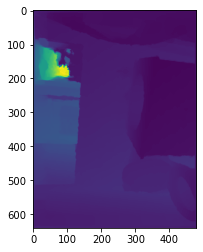

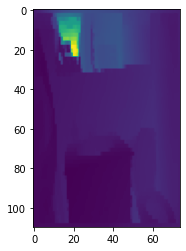

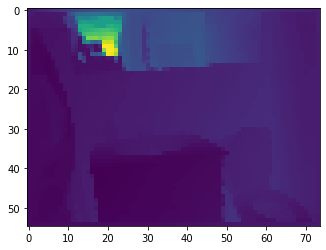

In [49]:
# testing some functions
depth = f['depths'][169]
print(depth.shape)
depth = np.flipud(depth).copy()
print(depth.shape)
plt.figure()
plt.imshow(depth)
depth = depth.reshape((1, depth.shape[0], depth.shape[1]))
print(depth.shape)
depth = depth.transpose((0, 2, 1))
# depth = depth.transpose((2, 0, 1))
print(depth.shape)
depth = torch.from_numpy(depth)
depth = depth.view(1, depth.shape[0], depth.shape[1], depth.shape[2])
print(list(depth.shape))
depth = nn.functional.interpolate(depth, size = (55, 74), mode='bilinear', align_corners=False)
depth_t = depth

###
print(depth_t.shape)
depth_cat = interleave([depth_t, depth_t], 2)
print(depth_cat.shape)
plt.figure()
plt.imshow(np.array(depth_cat)[0, 0])

###

depth = torch.log(depth)
depth_array = np.array(depth)
print(depth_array.shape)
# depth = (depth - depth.min())/(depth.max() - depth.min())
plt.figure()
plt.imshow(np.exp(depth_array[0, 0]))
print(depth_array[0].shape)
